### Simulation Results about Rank in partial selectivity

1. About the input data

 - independent binary elements:  
 
    $p\left(x_{i}^{\mu}=1\right)=1 / 2, \quad p\left(x_{i}^{\mu}=-1\right)=1 / 2$

 - outputs are chosen randomly:

    $p\left(y^{\mu}=1\right)=1 / 2, \quad p\left(y^{\mu}=-1\right)=1 / 2$

 - Stimuli modality: 

    Dimension N, independent patterns P 

 - Context modality:

    Dimension M, independent patterns K

2. About the normalized the random connection matrix:

   $J  \sim \mathcal{N}\left(0, \frac{1}{\mathcal{M} N_{m o d}}\right)$
   
   The matrix $J^i$ projects input in a single modality $i$ to a vector in mixed layer with length $N_c/\mathcal{P}$,
   and mix with other modality projections, then pass a threshold.
   
   $\mathcal{P}$ is the partition number 
   
3. The partial mixing example: $N_m = 3$ , $\mathcal{M} = 2$, $\mathcal{P} = 2$

    set stimuli modality is $\epsilon$, two contexts modality is $\eta$ and $\sigma$

    So for a input like $\xi_\mu = \{\epsilon_i,\eta_j,\sigma_k\}$, the response on cortical layer is
    
    $\left[\begin{array}{c}
    sign(J^\epsilon\epsilon_i+J^\eta\eta_j-\theta) \\
    sign(J^\epsilon\epsilon_i+J^\sigma\sigma_j-\theta)
    \end{array}\right]$
    
    keep the sparsity on the cortical layer is $f=0.5$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [2]:
class rank_test_nm3(object):
    
    def __init__(self,N,M,P,K,Nc):
        self.dim_stimuli = int(N)
        self.dim_context = int(M)
        self.num_sti_sample = int(P)
        self.num_con_sample = int(K)
        self.dim_cortical = int(Nc)
        
    def generate_input(self,P,N):
        matrix = np.sign(np.random.randn(P,N))
        return matrix
            
    
    def fix_sparsity(self,v,f=0.5):
        
        threshold = np.sort(v)[int((1-f)*v.size)]
        
        exite = v >= threshold
        inhibit = v < threshold
        
        v[exite] = 1
        v[inhibit] = 0
        
        return v
    
    
    def order_1(self,f=0.5):
        
        P = self.num_sti_sample
        K = self.num_con_sample
        N = self.dim_stimuli
        Nc = self.dim_cortical
        M = self.dim_context
        
        dim_order1 = int(Nc/3)
        J_sti = np.random.normal(0,1/np.sqrt(N),size=(dim_order1,N))
        J_con1 = np.random.normal(0,1/np.sqrt(M),size=(dim_order1,M))
        J_con2 = np.random.normal(0,1/np.sqrt(M),size=(dim_order1,M))
        
        sti_data = self.generate_input(P,N)
        con1_data = self.generate_input(K,M)
        con2_data = self.generate_input(K,M)
        
        mix_layer_data = np.zeros((P*K*K,Nc))
        
        l = 0
        
        for i in range(P): 
            
            for j in range(K): 
                
                for k in range(K):
                    
                    h_ijk = np.concatenate((self.fix_sparsity(np.matmul(J_sti,sti_data[i]),f),self.fix_sparsity(np.matmul(J_con1,con1_data[j]),f),self.fix_sparsity(np.matmul(J_con2,con2_data[k]),f)))
                    #mix_layer_data[l,:] = self.fix_sparsity(h_ijk)
                    mix_layer_data[l,:] = h_ijk
                    l = l + 1
        
        return mix_layer_data
    
    def order_2(self,f=0.5):
        
        P = self.num_sti_sample
        K = self.num_con_sample
        N = self.dim_stimuli
        Nc = self.dim_cortical
        M = self.dim_context
        
        dim_order2 = int(Nc/3)
        J_sti = np.random.normal(0,1/np.sqrt(N),size=(dim_order2,N))
        J_con1 = np.random.normal(0,1/np.sqrt(M),size=(dim_order2,M))
        J_con2 = np.random.normal(0,1/np.sqrt(M),size=(dim_order2,M))
        
        sti_data = self.generate_input(P,N)
        con1_data = self.generate_input(K,M)
        con2_data = self.generate_input(K,M)
        
        mix_layer_data = np.zeros((P*K*K,Nc))
        
        l = 0
        
        for i in range(P): 
            
            for j in range(K): 
                
                for k in range(K):
                    
                    h_ijk = np.concatenate((self.fix_sparsity(np.matmul(J_sti,sti_data[i])+np.matmul(J_con1,con1_data[j]),f),
                                            self.fix_sparsity(np.matmul(J_sti,sti_data[i])+np.matmul(J_con2,con2_data[k]),f),
                                            self.fix_sparsity(np.matmul(J_con1,con1_data[j])+np.matmul(J_con2,con2_data[k]),f)))
                    #mix_layer_data[l,:] = self.fix_sparsity(h_ijk)
                    mix_layer_data[l,:] = h_ijk
                    l = l + 1
        
        return mix_layer_data
    
    def order_3(self,f=0.5):
        
        P = self.num_sti_sample
        K = self.num_con_sample
        N = self.dim_stimuli
        Nc = self.dim_cortical
        M = self.dim_context
        
        dim_order3 = int(Nc)
        J_sti = np.random.normal(0,1/np.sqrt(N),size=(dim_order3,N))
        J_con1 = np.random.normal(0,1/np.sqrt(M),size=(dim_order3,M))
        J_con2 = np.random.normal(0,1/np.sqrt(M),size=(dim_order3,M))
        
        sti_data = self.generate_input(P,N)
        con1_data = self.generate_input(K,M)
        con2_data = self.generate_input(K,M)
        
        mix_layer_data = np.zeros((P*K*K,Nc))
        
        l = 0
        
        for i in range(P): 
            
            for j in range(K): 
                
                for k in range(K):
                    
                    h_ijk = self.fix_sparsity(np.matmul(J_sti,sti_data[i])+np.matmul(J_con1,con1_data[j])+np.matmul(J_con2,con2_data[k]),f)
                    #mix_layer_data[l,:] = self.fix_sparsity(h_ijk)
                    mix_layer_data[l,:] = h_ijk
                    l = l + 1
        
        return mix_layer_data

In [3]:
Klist = np.linspace(1,10,10)
N = 100
M = 100
P = 50
Nc = 6000
rk1 = []
rk2 = []
rk3 = []
f=0.5

for K in Klist:
    model_K = rank_test_nm3(N,M,P,K,Nc)
    mtx_order1 = model_K.order_1(f)
    mtx_order2 = model_K.order_2(f)
    mtx_order3 = model_K.order_3(f)
    
    rk1.append(np.linalg.matrix_rank(mtx_order1))
    rk2.append(np.linalg.matrix_rank(mtx_order2))
    rk3.append(np.linalg.matrix_rank(mtx_order3))

In [4]:
print(rk1)
print(rk2)
print(rk3)

[50, 52, 54, 56, 58, 60, 62, 64, 66, 68]
[50, 151, 254, 359, 466, 575, 686, 799, 914, 1031]
[50, 200, 450, 800, 1250, 1800, 2450, 3200, 4050, 5000]


In [5]:
from IPython import display
display.set_matplotlib_formats('svg')

In [6]:
P = 50

def pred1(K):
    
    return P+2*K-2 

def pred2(K):
    
    return K**2+(P-1)*(2*K-1)

def pred3(K):
    
    return P*K*K

def pred_wrong(K):
    
    return K*(P-1+K)

In [8]:
rk2

[50, 151, 254, 359, 466, 575, 686, 799, 914, 1031]

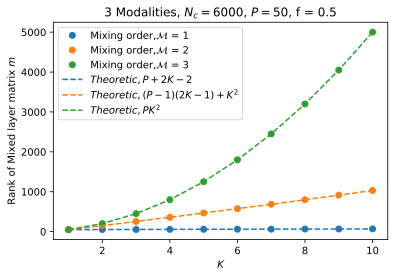

In [12]:
plt.plot(Klist,rk1,'o',color = 'tab:blue',label=r'Mixing order,$\mathcal{M}$ = 1')
plt.plot(Klist,rk2,'o',color = 'tab:orange',label=r'Mixing order,$\mathcal{M}$ = 2')
#plt.plot(Klist,[i*2 for i in rk2],'o',mec = 'tab:orange',mfc='white',label=r'2$Rank$')
plt.plot(Klist,rk3,'o',color = 'tab:green',label=r'Mixing order,$\mathcal{M}$ = 3')

plt.plot(Klist,pred1(Klist),'--',color = 'tab:blue',label = r'$Theoretic, P+2K-2$')
plt.plot(Klist,pred2(Klist),'--',color = 'tab:orange',label = r'$Theoretic, (P-1)(2K-1)+K^2$')
plt.plot(Klist,pred3(Klist),'--',color = 'tab:green',label = r'$Theoretic, PK^2$')
#plt.plot(Klist,pred_wrong(Klist),'--',color = 'black',label = r'$K(P-1+K)$, not correct')

plt.title(r'3 Modalities, $N_c = 6000$, $P=50$, f = 0.5')
plt.xlabel(r'$K$')
plt.ylabel(r'Rank of Mixed layer matrix $m$')
plt.legend()

plt.show()

1. limit of P,K, when $\mathcal{M} = 1$

In [ ]:
def limit_1(K):
    return (4*K-4)/(K**2-2)

plt.plot(Klist,limit_1(Klist),'.--')
pl

### Effected by the sparseness on the cortical layer

In [58]:
K = 10
N = 100
M = 100
P = 25
Nc = 3000
rk1_f = []
rk2_f = []
rk3_f = []
flist = 10**np.linspace(-3,0,100)

for f in flist:
    model_K = rank_test_nm3(N,M,P,K,Nc)
    mtx_order1 = model_K.order_1(f)
    mtx_order2 = model_K.order_2(f)
    mtx_order3 = model_K.order_3(f)
    
    rk1_f.append(np.linalg.matrix_rank(mtx_order1))
    rk2_f.append(np.linalg.matrix_rank(mtx_order2))
    rk3_f.append(np.linalg.matrix_rank(mtx_order3))

In [59]:
print(rk1_f)
print(rk2_f)
print(rk3_f)

[68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 1]
[901, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1]
[2900, 3461, 3968, 4204, 4654, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 1]


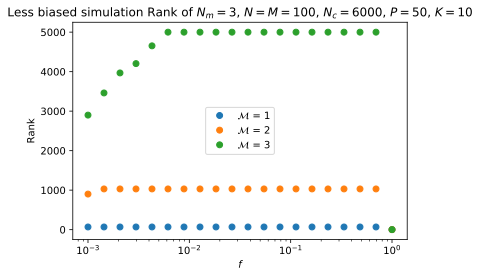

In [60]:
plt.plot(flist,rk1_f,'o',color = 'tab:blue',label=r'$\mathcal{M}$ = 1')
plt.plot(flist,rk2_f,'o',color = 'tab:orange',label=r'$\mathcal{M}$ = 2')
plt.plot(flist,rk3_f,'o',color = 'tab:green',label=r'$\mathcal{M}$ = 3')

plt.title(r'Less biased simulation Rank of $N_m = 3$, $N=M =100$, $N_c = 6000$, $P=50$, $K=10$')
plt.xlabel(r'$f$')
plt.ylabel('Rank')
plt.xscale('log')
plt.legend()

plt.show()

### Sparseness effect, smaller 

In [13]:
from tqdm import tqdm

K = 10
N = 100
M = 100
P = 20
Nc = 3000

flist = 10**np.linspace(-3,0,100)

rk3_f_times = np.zeros((10,100))

# repeat for 10 times
for time in tqdm(range(10)):
    
    #rk1_f = []
    #rk2_f = []
    rk3_f = []
    
    for f in flist:
        model_K = rank_test_nm3(N,M,P,K,Nc)
        #mtx_order1 = model_K.order_1(f)
        #mtx_order2 = model_K.order_2(f)
        mtx_order3 = model_K.order_3(f)
        
        #rk1_f.append(np.linalg.matrix_rank(mtx_order1))
        #rk2_f.append(np.linalg.matrix_rank(mtx_order2))
        rk3_f.append(np.linalg.matrix_rank(mtx_order3))
    
    rk3_f_times[time,:] = rk3_f

100%|██████████| 10/10 [1:49:55<00:00, 659.55s/it] 


In [17]:
np.savetxt(r'mix3_rank2f.txt',rk3_f_times,fmt='$%.5f')

In [22]:
flist_2 = 1 - 10**np.linspace(-3,-1,30)
flist_2

array([0.999     , 0.9988279 , 0.99862618, 0.99838974, 0.99811261,
       0.99778778, 0.99740706, 0.9969608 , 0.99643775, 0.99582468,
       0.9951061 , 0.99426385, 0.99327664, 0.99211954, 0.99076329,
       0.98917363, 0.98731039, 0.98512648, 0.98256671, 0.9795664 ,
       0.97604973, 0.97192784, 0.96709655, 0.9614338 , 0.95479646,
       0.94701683, 0.93789831, 0.92721046, 0.91468321, 0.9       ])

In [23]:
from tqdm import tqdm

K = 10
N = 100
M = 100
P = 20
Nc = 3000

flist_2 = 1 - 10**np.linspace(-3,-1,30)

rk3_f_times2 = np.zeros((10,30))

# repeat for 10 times
for time in tqdm(range(10)):
    
    #rk1_f = []
    #rk2_f = []
    rk3_f = []
    
    for f in flist_2:
        model_K = rank_test_nm3(N,M,P,K,Nc)
        #mtx_order1 = model_K.order_1(f)
        #mtx_order2 = model_K.order_2(f)
        mtx_order3 = model_K.order_3(f)
        
        #rk1_f.append(np.linalg.matrix_rank(mtx_order1))
        #rk2_f.append(np.linalg.matrix_rank(mtx_order2))
        rk3_f.append(np.linalg.matrix_rank(mtx_order3))
    
    rk3_f_times2[time,:] = rk3_f

100%|██████████| 10/10 [25:44<00:00, 154.48s/it]


In [24]:
np.savetxt(r'mix3_rank2f_2.txt',rk3_f_times2,fmt='%.5f')

In [27]:
K = 10
N = 100
M = 100
P = 20
Nc = 3000

flist_3 = np.linspace(0.0033,0.0042,30)

rk3_f_times3 = np.zeros((10,30))

# repeat for 10 times
for time in tqdm(range(10)):
    
    #rk1_f = []
    #rk2_f = []
    rk3_f = []
    
    for f in flist_3:
        model_K = rank_test_nm3(N,M,P,K,Nc)
        mtx_order3 = model_K.order_3(f)
        
        #rk1_f.append(np.linalg.matrix_rank(mtx_order1))
        #rk2_f.append(np.linalg.matrix_rank(mtx_order2))
        rk3_f.append(np.linalg.matrix_rank(mtx_order3))
    
    rk3_f_times3[time,:] = rk3_f

100%|██████████| 10/10 [24:08<00:00, 144.86s/it]


In [29]:
np.savetxt(r'mix3_rank2f_3.txt',rk3_f_times3,fmt='%.5f')

In [30]:
import matplotlib.pyplot as plt
from IPython import display

In [31]:
display.set_matplotlib_formats('svg')

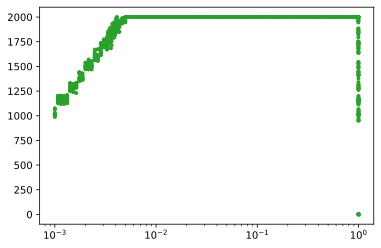

In [33]:
for i in range(10):
    plt.plot(flist,rk3_f_times[i],'.',color='tab:green')
    plt.plot(flist_2,rk3_f_times2[i],'.',color='tab:green')
    plt.plot(flist_3,rk3_f_times3[i],'.',color='tab:green')
    
plt.xscale('log')
plt.show()

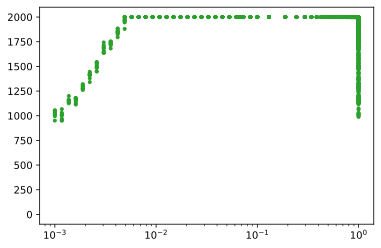

In [34]:
for i in range(10):
    plt.plot(1-flist,rk3_f_times[i],'.',color='tab:green')
    plt.plot(1-flist_2,rk3_f_times2[i],'.',color='tab:green')
    plt.plot(1-flist_3,rk3_f_times3[i],'.',color='tab:green')
    
plt.xscale('log')
plt.show()

#### Use discrete active neuron numbers as parameters

In [22]:
K = 10
N = 100
M = 100
P = 20
Nc = 3000

flist_0 = np.linspace(1,20,20)/3000.

rk3_f_times0 = np.zeros((5,20))

for time in tqdm_notebook(range(5),desc='1st Loop'):
    
    rk3_f = []
    
    for f in tqdm_notebook(flist_0,desc='2nd Loop',leave = False):
        
        model_K = rank_test_nm3(N,M,P,K,Nc)
        mtx_order3 = model_K.order_3(f)
        
        rk3_f.append(np.linalg.matrix_rank(mtx_order3))
    
    rk3_f_times0[time,:] = rk3_f

In [25]:
rk3_f_times0

array([[ 572.,  842.,  985., 1144., 1325., 1424., 1491., 1614., 1645.,
        1756., 1768., 1840., 1907., 1977., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 573.,  820.,  977., 1170., 1284., 1392., 1564., 1600., 1629.,
        1731., 1822., 1874., 1901., 1961., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 555.,  801., 1043., 1175., 1292., 1422., 1513., 1572., 1630.,
        1749., 1764., 1862., 1977., 2000., 1977., 2000., 2000., 2000.,
        2000., 2000.],
       [ 577.,  833., 1022., 1148., 1273., 1418., 1498., 1626., 1673.,
        1746., 1784., 1857., 1908., 1939., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [ 579.,  776., 1005., 1130., 1340., 1356., 1512., 1582., 1717.,
        1768., 1811., 1889., 1912., 1902., 2000., 2000., 2000., 2000.,
        2000., 2000.]])

In [33]:
from IPython import display

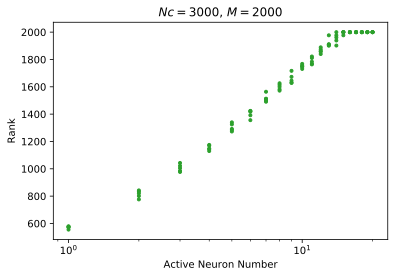

In [42]:
display.set_matplotlib_formats('svg')
for i in range(5):
    plt.plot(flist_0*3000,rk3_f_times0[i],'.',color='tab:green')

plt.title(r'$Nc=3000$, $M=2000$')
plt.xscale('log')
plt.xlabel('Active Neuron Number')
plt.ylabel('Rank')
plt.show()

##### Fit the exponential index

In [43]:
import scipy.optimize as opt

In [73]:
x_all = list(flist_0*3000)*5
y_all= list(rk3_f_times0.flat)

In [66]:
# prapare the data
x = list(flist_0[1:14]*3000)*5
y = list(rk3_f_times0[:,1:14].flat)

In [67]:
def func(x,k,b):
    return k*np.log10(x)+b

In [68]:
popt, pcov = opt.curve_fit(func, x, y)

In [69]:
popt

array([1391.51436521,  346.91266284])

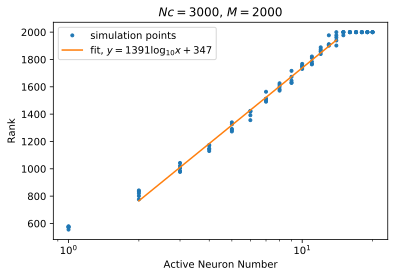

In [77]:
plt.plot(x_all,y_all,'.',label='simulation points')
plt.plot(x,func(x,popt[0],popt[1]),ls='-',label=r'fit, $y=1391\log_{10}x+347$')
plt.legend()
plt.title(r'$Nc=3000$, $M=2000$')
plt.xscale('log')
plt.xlabel('Active Neuron Number')
plt.ylabel('Rank')
plt.show()

In [31]:
K = 10
N = 100
M = 100
P = 20
Nc = 3000

flist_01 = np.linspace(2981,3000,20)/3000.

rk3_f_times01 = np.zeros((5,20))

for time in tqdm_notebook(range(5),desc='1st Loop'):
    
    rk3_f = []
    
    for f in tqdm_notebook(flist_01,desc='2nd Loop',leave = False):
        
        model_K = rank_test_nm3(N,M,P,K,Nc)
        mtx_order3 = model_K.order_3(f)
        
        rk3_f.append(np.linalg.matrix_rank(mtx_order3))
    
    rk3_f_times01[time,:] = rk3_f

In [32]:
rk3_f_times01

array([[2.000e+03, 2.000e+03, 2.000e+03, 2.000e+03, 2.000e+03, 1.963e+03,
        1.877e+03, 1.921e+03, 1.796e+03, 1.639e+03, 1.648e+03, 1.603e+03,
        1.349e+03, 1.397e+03, 1.341e+03, 1.003e+03, 1.003e+03, 8.110e+02,
        1.000e+00, 1.000e+00],
       [2.000e+03, 2.000e+03, 2.000e+03, 2.000e+03, 2.000e+03, 1.977e+03,
        1.843e+03, 1.846e+03, 1.816e+03, 1.687e+03, 1.676e+03, 1.642e+03,
        1.385e+03, 1.434e+03, 1.368e+03, 1.013e+03, 1.077e+03, 7.580e+02,
        1.000e+00, 1.000e+00],
       [2.000e+03, 2.000e+03, 2.000e+03, 1.966e+03, 2.000e+03, 1.969e+03,
        1.836e+03, 1.868e+03, 1.810e+03, 1.658e+03, 1.626e+03, 1.582e+03,
        1.424e+03, 1.396e+03, 1.316e+03, 1.020e+03, 9.840e+02, 8.460e+02,
        1.000e+00, 1.000e+00],
       [2.000e+03, 2.000e+03, 2.000e+03, 2.000e+03, 2.000e+03, 1.982e+03,
        1.895e+03, 1.834e+03, 1.850e+03, 1.645e+03, 1.656e+03, 1.635e+03,
        1.437e+03, 1.346e+03, 1.274e+03, 9.730e+02, 1.031e+03, 8.250e+02,
        1.000e+00, 

#### Partial selective case

In [37]:
K = 10
N = 100
M = 100
P = 20
Nc = 3000

flist_0 = np.linspace(1,20,20)/3000.

rk2_f_times0 = np.zeros((5,20))

for time in tqdm_notebook(range(5),desc='1st Loop'):
    
    rk2_f = []
    
    for f in tqdm_notebook(flist_0,desc='2nd Loop',leave = False):
        
        model_K = rank_test_nm3(N,M,P,K,Nc)
        mtx_order2 = model_K.order_2(f)
        
        rk2_f.append(np.linalg.matrix_rank(mtx_order2))
    
    rk2_f_times0[time,:] = rk2_f

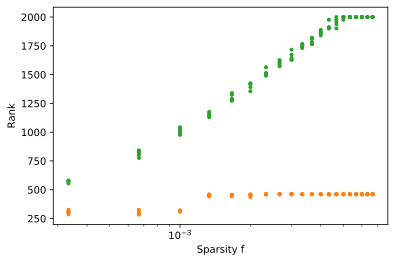

In [38]:
for i in range(5):
    plt.plot(flist_0,rk3_f_times0[i],'.',color='tab:green')
    plt.plot(flist_0,rk2_f_times0[i],'.',color='tab:orange')

plt.xscale('log')
plt.xlabel('Sparsity f')
plt.ylabel('Rank')
plt.show()

### A fully random $2000 \times 3000$ matrix's rank to sparsity relation

In [26]:
def sparsify(x,f):
    
    res = x.copy()
    
    for i in range(x.shape[0]):
        res[i,:] = rank_test_nm3.fix_sparsity(_,x[i,:],f)
    
    return res

In [12]:
from tqdm import tqdm_notebook

In [27]:
flist_r = np.linspace(1,20,20)/3000.

rk_r_times = np.zeros((5,20))

# repeat for 10 times
for time in tqdm_notebook(range(5),desc='1st loop'):
    
    rk_r = []
    
    for f in tqdm_notebook(flist_r,desc='2nd loop',leave=False):
        mtx_r = sparsify(np.random.normal(0,1,(2000,3000)),f)
        
        rk_r.append(np.linalg.matrix_rank(mtx_r))
    
    
    rk_r_times[time,:] = rk_r

In [28]:
rk_r_times

array([[1478., 1954., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [1459., 1954., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [1477., 1962., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [1465., 1942., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [1441., 1955., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.]])

#### smaller variance

In [29]:
flist_r = np.linspace(1,20,20)/3000.

rk_r_times2 = np.zeros((5,20))

# repeat for 10 times
for time in tqdm_notebook(range(5),desc='1st loop'):
    
    rk_r = []
    
    for f in tqdm_notebook(flist_r,desc='2nd loop',leave=False):
        mtx_r = sparsify(np.random.normal(0,0.1,(2000,3000)),f)
        
        rk_r.append(np.linalg.matrix_rank(mtx_r))
    
    
    rk_r_times2[time,:] = rk_r

In [30]:
rk_r_times2

array([[1465., 1964., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [1444., 1962., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [1440., 1969., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [1446., 1964., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.],
       [1448., 1952., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
        2000., 2000.]])

look unrelated with the variance